In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
# Import Data
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Data information
print("train data contains {} rows and {} columns".format(train.shape[0], train.shape[1]))
print("test data contains {} rows and {} columns".format(test.shape[0], test.shape[1]))

train data contains 1460 rows and 81 columns
test data contains 1459 rows and 80 columns


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Drop the Id column
train.drop("Id", axis = 1, inplace = True)

### Analysis of the target variable

In [6]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


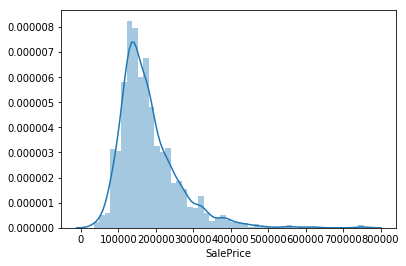

In [7]:
# Target distribution
sns.distplot(train["SalePrice"])

In [8]:
print('The Skewness is {}'.format(train['SalePrice'].skew()))
print(('The Kurtosis is {}').format(train['SalePrice'].kurt()))

The Skewness is 1.8828757597682129
The Kurtosis is 6.536281860064529


I will proceed for the transformation after deletting the outliers

## Data analysis

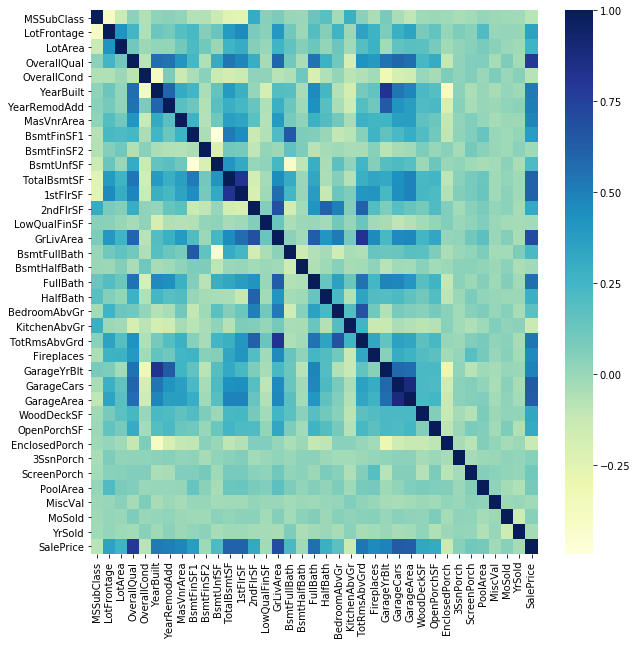

In [9]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(corr, cmap = "YlGnBu")

In [10]:
def percentage(x):
    return "{0:.2f}%".format(x*100)

In [11]:
corr["SalePrice"].sort_values(ascending = False).apply(percentage)

SalePrice        100.00%
OverallQual       79.10%
GrLivArea         70.86%
GarageCars        64.04%
GarageArea        62.34%
TotalBsmtSF       61.36%
1stFlrSF          60.59%
FullBath          56.07%
TotRmsAbvGrd      53.37%
YearBuilt         52.29%
YearRemodAdd      50.71%
GarageYrBlt       48.64%
MasVnrArea        47.75%
Fireplaces        46.69%
BsmtFinSF1        38.64%
LotFrontage       35.18%
WoodDeckSF        32.44%
2ndFlrSF          31.93%
OpenPorchSF       31.59%
HalfBath          28.41%
LotArea           26.38%
BsmtFullBath      22.71%
BsmtUnfSF         21.45%
BedroomAbvGr      16.82%
ScreenPorch       11.14%
PoolArea           9.24%
MoSold             4.64%
3SsnPorch          4.46%
BsmtFinSF2        -1.14%
BsmtHalfBath      -1.68%
MiscVal           -2.12%
LowQualFinSF      -2.56%
YrSold            -2.89%
OverallCond       -7.79%
MSSubClass        -8.43%
EnclosedPorch    -12.86%
KitchenAbvGr     -13.59%
Name: SalePrice, dtype: object

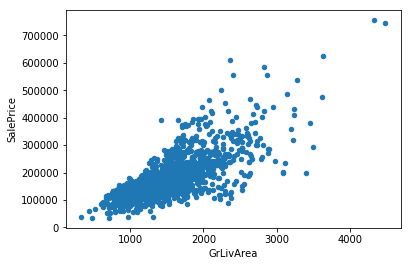

In [12]:
# GrLivArea

# Delete the outliers 
train = train.drop(train[(train["GrLivArea"] > 4000) & (train["SalePrice"] < 300000)].index)

# Plotting
train.plot.scatter(x = "GrLivArea", y = "SalePrice")

GrLivArea and SalePrice are linearly correlated

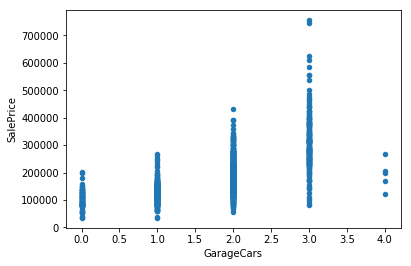

In [13]:
# GarageCars
train.plot.scatter(x = "GarageCars", y = "SalePrice")

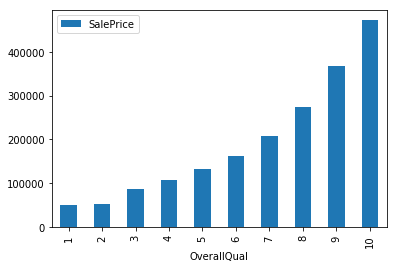

In [14]:
# OverallQual
qual_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.mean)
qual_pivot.plot.bar()

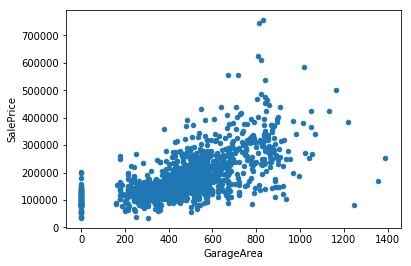

In [15]:
# GarageArea
train.plot.scatter(x='GarageArea', y='SalePrice')

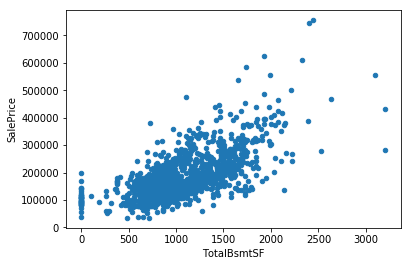

In [16]:
# TotalBsmtSF
train.plot.scatter(x='TotalBsmtSF', y='SalePrice')

#### Transformation

lambda = -0.07712951475421644


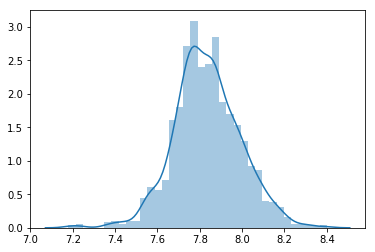

In [17]:
y, fitted_lambda = stats.boxcox(train["SalePrice"])
print("lambda = {}".format(fitted_lambda))
sns.distplot(y)

# Feature Engeniering

## Handle missing Data

In [18]:
# Handle missing values for features where median/mean or most common value doesn't make sense

In [19]:
# Alley : data description says NA means "no alley access"
train["Alley"].fillna("None", inplace = True)

# BedroomAbvGr : NA most likely means 0
train["BedroomAbvGr"].fillna(0, inplace = True)

# BsmtQual etc : data description says NA for basement features is "no basement"
train['BsmtQual'].fillna('No', inplace = True)
train['BsmtCond'].fillna('No', inplace = True)
train['BsmtExposure'].fillna('No', inplace = True)
train['BsmtFinType1'].fillna('No', inplace = True)
train['BsmtFinType2'].fillna('No', inplace = True)
train['BsmtFullBath'].fillna('No', inplace = True)
train['BsmtHalfBath'].fillna('No', inplace = True)
train['BsmtUnfSF'].fillna('No', inplace = True)

# CentralAir : NA most likely means No
train['CentralAir'].fillna('N', inplace = True)

# Condition : NA most likely means Normal
train['Condition1'].fillna('Norm', inplace = True)
train['Condition2'].fillna('Norm', inplace = True)

# EnclosedPorch : NA most likely means no enclosed porch
train['EnclosedPorch'].fillna(0, inplace = True)

# External stuff : NA most likely means average
train['ExterCond'].fillna('TA', inplace = True)
train['ExterQual'].fillna('TA', inplace = True)

# Fence : data description says NA means "no fence"
train['Fence'].fillna('No', inplace = True)

# FireplaceQu : data description says NA means "no fireplace"
train['FireplaceQu'].fillna('No', inplace = True)
train['Fireplaces'].fillna(0, inplace = True)

# Functional : data description says NA means typical
train['Functional'].fillna('Typ', inplace = True)

# GarageType etc : data description says NA for garage features is "no garage"
train['GarageType'].fillna('No', inplace = True)
train['GarageFinish'].fillna('No', inplace = True)
train['GarageQual'].fillna('No', inplace = True)
train['GarageCond'].fillna('No', inplace = True)
train['GarageArea'].fillna(0, inplace = True)
train['GarageCars'].fillna(0, inplace = True)

# HalfBath : NA most likely means no half baths above grade
train['HalfBath'].fillna(0, inplace = True)

# HeatingQC : NA most likely means typical
train['HeatingQC'].fillna('TA', inplace = True)

# KitchenAbvGr : NA most likely means 0
train['KitchenAbvGr'].fillna(0, inplace = True)

# KitchenQual : NA most likely means typical
train['KitchenQual'].fillna('TA', inplace = True)

# LotFrontage : NA most likely means no lot frontage
train['LotFrontage'].fillna(0, inplace = True)

# LotShape : NA most likely means regular
train['LotShape'].fillna('Reg', inplace = True)

# MasVnrType : NA most likely means no veneer
train["MasVnrType"].fillna("None", inplace = True)
train['MasVnrArea'].fillna(0, inplace = True)

# MiscFeature : data description says NA means "no misc feature"
train['MiscFeature'].fillna('No', inplace = True)
train['MiscVal'].fillna(0, inplace = True)

# OpenPorchSF : NA most likely means no open porch
train['OpenPorchSF'].fillna(0, inplace = True)

# PavedDrive : NA most likely means not paved
train['PavedDrive'].fillna('N', inplace = True)

# PoolQC : data description says NA means "no pool"
train['PoolQC'].fillna('No', inplace = True)
train['PoolArea'].fillna(0, inplace = True)

# SaleCondition : NA most likely means normal sale
train['SaleCondition'].fillna('Normal', inplace = True)

# ScreenPorch : NA most likely means no screen porch
train['ScreenPorch'].fillna(0, inplace = True)

# TotRmsAbvGrd : NA most likely means 0
train['TotRmsAbvGrd'].fillna(0, inplace = True)

# Utilities : NA most likely means all public utilities
train['Utilities'].fillna('Utilities', inplace = True)

# WoodDeckSF : NA most likely means no wood deck
train['WoodDeckSF'].fillna(0, inplace = True)

In [20]:
# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [21]:
# Encode some categorical features as ordered numbers when there is information in the order
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

### Creation of new features

In [22]:
# 1* Simplifications of existing features
train["SimplOverallQual"] = train['OverallQual'].replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

train["SimplOverallCond"] = train['OverallCond'].replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

train["SimplPoolQC"] = train['PoolQC'].replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })

train["SimplGarageCond"] = train['GarageCond'].replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

train["SimplGarageQual"] = train['GarageQual'].replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

train["SimplFireplaceQu"] = train['FireplaceQu'].replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

train["SimplFireplaceQu"] = train['FireplaceQu'].replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

train["SimplFunctional"] = train['Functional'].replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })

train["SimplKitchenQual"] = train['KitchenQual'].replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

train["SimplHeatingQC"] = train['HeatingQC'].replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

train["SimplBsmtFinType1"] = train['BsmtFinType1'].replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })

train["SimplBsmtFinType2"] = train['BsmtFinType2'].replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })

train["SimplBsmtCond"] = train['BsmtCond'].replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })

train["SimplBsmtQual"] = train['BsmtQual'].replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })

train["SimplExterCond"] = train['ExterCond'].replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

train["SimplExterQual"] = train['ExterQual'].replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

In [23]:
# 2* Combinations of existing features
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
# Simplified overall quality of the house
train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]
# Simplified overall quality of the exterior
train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]
# Simplified overall pool score
train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]
# Simplified overall garage score
train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]
# Simplified overall fireplace score
train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]
# Simplified overall kitchen score
train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]
# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])
# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]
# Has masonry veneer or not
train["HasMasVnr"] = train['MasVnrType'].replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
train["BoughtOffPlan"] = train['SaleCondition'].replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [24]:
# 3* Polynomials (square, cube, square root) on the top 10 existing features

train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
train["AllSF-2"] = train["AllSF"] ** 2
train["AllSF-3"] = train["AllSF"] ** 3
train["AllSF-Sq"] = np.sqrt(train["AllSF"])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])

In [25]:
# Differentiate numerical features (minus the target) and categorical features

categorical_features  = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop('SalePrice')

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 117
Categorical features : 26


In [26]:
# Handle remaining missing values for numerical features by using median as replacement

print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

train_num.fillna(train_num.median(),inplace = True)

print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 81


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Remaining NAs for numerical features in train : 0


In [27]:
##skewed_feats = train_num.apply(lambda x: skew(x.dropna())) here we are dropping NULL to evaludate skewness

from scipy.stats import skew
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")


skewed_features = skewness.index
# Using log(1 + feature value for transformation)
train_num[skewed_features] = np.log1p(train_num[skewed_features])  ## log1p = log(1+ feature value)

88 skewed numerical features to log transform


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [28]:
# Create dummy features for categorical values via one-hot encoding

print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for categorical features in train : 1
Remaining NAs for categorical features in train : 0


In [29]:
### Join categorical and numerical features

train = pd.concat([train_num,train_cat], axis =1)
print("New number of features : " + str(train.shape[1]))


# Partition the dataset in train + validation sets

X_train, X_valid, y_train, y_valid = train_test_split(train,y,test_size = 0.25, random_state = 1,shuffle= True)

New number of features : 319


In [30]:
# Partition the dataset in train + validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size = 0.3, random_state = 0)

In [31]:
print("X_train : " + str(X_train.shape))
print("X_valid : " + str(X_valid.shape))
print("y_train : " + str(y_train.shape))
print("y_valid : " + str(y_valid.shape))

X_train : (1020, 319)
X_valid : (438, 319)
y_train : (1020,)
y_valid : (438,)


In [32]:
print(np.any(np.isnan(X_train)))  ## this should be False
print(np.all(np.isfinite(X_train))) ##This should be True

False
True


In [33]:
# Standardize numerical features
##Here we have used only the train data to standardize the columns

scale = StandardScaler()

X_train[numerical_features] = scale.fit_transform(X_train[numerical_features])
X_valid[numerical_features] = scale.transform(X_valid[numerical_features])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

# Modelisation

In [34]:
## Define the scoring function

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train_model(model):
    rmse = np.sqrt(-cross_val_score(model, X_train,y_train,scoring = scorer,cv=10))
    return rmse

def rmse_cv_valid_model(model):
    rmse = np.sqrt(-cross_val_score(model, X_valid,y_valid,scoring = scorer,cv=10))
    return rmse 

### Linear Regression without regularization

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Look at predictions on training and validation set
print('RMSE on Train Set:', rmse_cv_train_model(lr).mean() )
print('RMSE on Valid Set:', rmse_cv_valid_model(lr).mean() )

y_train_pred = lr.predict(X_train)
y_valid_pred = lr.predict(X_valid)

RMSE on Train Set: 22210410.15389783
RMSE on Valid Set: 0.14123500491852775


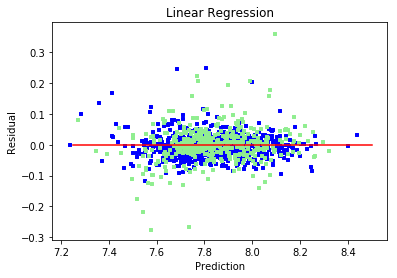

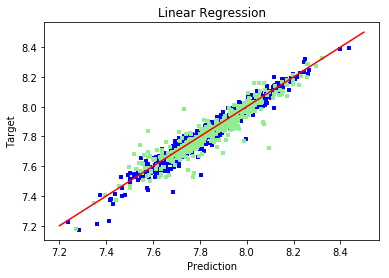

In [48]:
##PLot residual

plt.scatter(x = y_train_pred, y = y_train_pred - y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid_pred - y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([7.25, 8.5], [0.0, 0.0], c = "red")
plt.title('Linear Regression')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

##PLot target vs prediction

plt.scatter(x = y_train_pred, y = y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([7.2, 8.5], [7.2, 8.5], c = "red") ## [starting x ,ending  x] [starting y ,ending  y]
plt.title('Linear Regression')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

### Linear regression with Ridge regularization

In [54]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas = [0.01,0.03,0.06,1,2,3,6,12,18,20,25,30,35,40,45,50,55,60])

ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('Best Alpha found till now', alpha)

Best Alpha found till now 25.0


In [55]:
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 10)

ridge.fit(X_train,y_train)

print('Best Alpha found :', ridge.alpha_)

Best Alpha found : 25.0


In [56]:
##Ignore the warnings

import warnings
warnings.filterwarnings('ignore')

In [57]:
# Look at predictions on training and validation set
print('RMSE on Train Set:', rmse_cv_train_model(ridge).mean() )
print('RMSE on Valid Set:', rmse_cv_valid_model(ridge).mean() )

y_train_pred = ridge.predict(X_train)
y_valid_pred = ridge.predict(X_valid)

RMSE on Train Set: 0.0454775033798598
RMSE on Valid Set: 0.04816603980502456


RMSE is much lower for both Training and Validation with Ridge regression

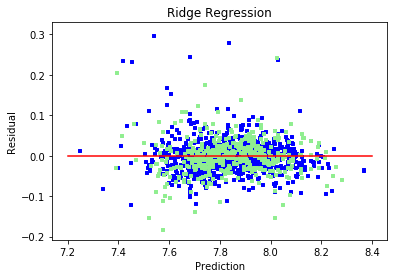

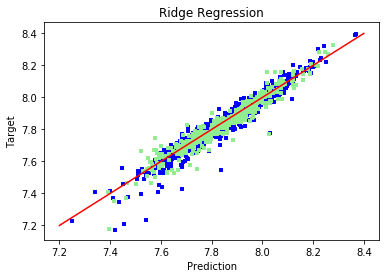

In [60]:
##PLot residual

plt.scatter(x = y_train_pred, y = y_train_pred - y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid_pred - y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([7.2, 8.4], [0.0, 0.0], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

##PLot target vs prediction

plt.scatter(x = y_train_pred, y = y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([7.2, 8.4], [7.2, 8.4], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

In [61]:
# Plot important coefficients

coefs = pd.Series(ridge.coef_, index = X_train.columns)

print('Ridge takes ', sum(coefs!=0) , 'features and eliminated', sum(coefs ==0), 'features')

Ridge takes  313 features and eliminated 6 features


Text(0.5, 1.0, 'Important Features')

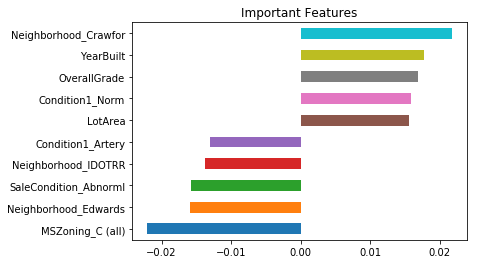

In [62]:
imp_coef = pd.concat([coefs.sort_values().head(), coefs.sort_values().tail()])
imp_coef.plot(kind = 'barh')
plt.title('Important Features')

### Linear regression with Lasso regularization

In [63]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1,5,10], 
                max_iter = 100000, cv = 10)
lasso.fit(X_train,y_train)

alpha = lasso.alpha_
print('Best alpha found till now', alpha)

Best alpha found till now 0.0003


In [64]:
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 10)

lasso.fit(X_train,y_train)

print('Best Alpha found :', lasso.alpha_)

Best Alpha found : 0.00033


In [65]:
# Look at predictions on training and validation set
print('RMSE on Train Set:', rmse_cv_train_model(lasso).mean() )
print('RMSE on Valid Set:', rmse_cv_valid_model(lasso).mean() )

y_train_pred = lasso.predict(X_train)
y_valid_pred = lasso.predict(X_valid)

RMSE on Train Set: 0.04510322768835352
RMSE on Valid Set: 0.04732988688987915


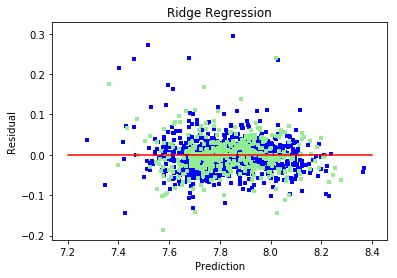

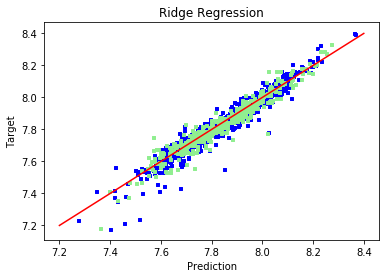

In [68]:
##PLot residual

plt.scatter(x = y_train_pred, y = y_train_pred - y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid_pred - y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([7.2, 8.4], [0.0, 0.0], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

##PLot target vs prediction

plt.scatter(x = y_train_pred, y = y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([7.2, 8.4], [7.2, 8.4], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

In [69]:
# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train.columns)

print('Ridge takes ', sum(coefs!=0) , 'features and eliminated', sum(coefs ==0), 'features')

Ridge takes  91 features and eliminated 228 features


Text(0.5, 1.0, 'Important Features for L1 (Lasso) Regression')

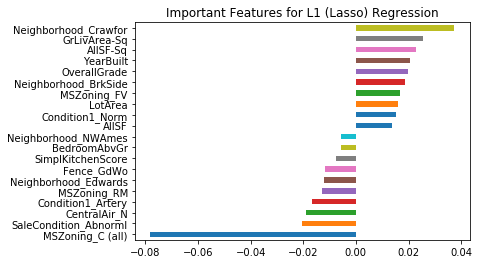

In [70]:
imp_coef = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coef.plot(kind = 'barh')
plt.title('Important Features for L1 (Lasso) Regression')

### Linear Regression with ElasticNet regularization 

In [71]:
from sklearn.linear_model import ElasticNetCV

elasticnet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 100000, cv = 10)

##l1_ratio is the ratio of L1 and L2 regularization. 0 means only L2 is required. 1 means only L1 is required.

elasticnet.fit(X_train,y_train)

alpha = elasticnet.alpha_
l1ratio = elasticnet.l1_ratio_
print('Best alpha found till now', alpha)
print('Best L1 ratio  found till now', l1ratio)

Best alpha found till now 0.001
Best L1 ratio  found till now 0.3


In [72]:
ratio = l1ratio

elasticnet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 100000, cv = 10)

elasticnet.fit(X_train,y_train)

if elasticnet.l1_ratio_ > 1:
    elasticnet.l1_ratio_ = 1
    

alpha = elasticnet.alpha_
l1ratio = elasticnet.l1_ratio_
print('Best alpha found till now', alpha)
print('Best L1 ratio  found till now', l1ratio)

Best alpha found till now 0.001
Best L1 ratio  found till now 0.27


In [73]:
# Look at predictions on training and validation set
print('RMSE on Train Set:', rmse_cv_train_model(elasticnet).mean() )
print('RMSE on Valid Set:', rmse_cv_valid_model(elasticnet).mean() )

y_train_pred = elasticnet.predict(X_train)
y_valid_pred = elasticnet.predict(X_valid)

RMSE on Train Set: 0.04536429132784719
RMSE on Valid Set: 0.04799383110682641


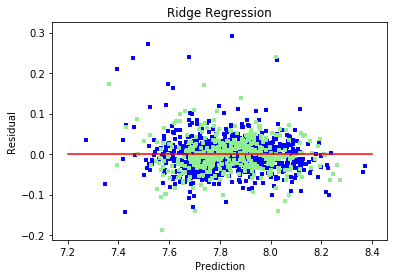

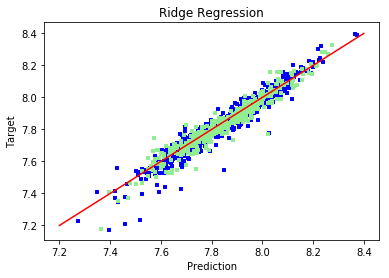

In [74]:
##PLot residual

plt.scatter(x = y_train_pred, y = y_train_pred - y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid_pred - y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([7.2, 8.4], [0.0, 0.0], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

##PLot target vs prediction

plt.scatter(x = y_train_pred, y = y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([7.2, 8.4], [7.2, 8.4], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

In [76]:
# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train.columns)

print('Ridge takes ', sum(coefs!=0) , 'features and eliminated', sum(coefs ==0), 'features')

Ridge takes  91 features and eliminated 228 features


Text(0.5, 1.0, 'Important Features for Elasticnet Regression')

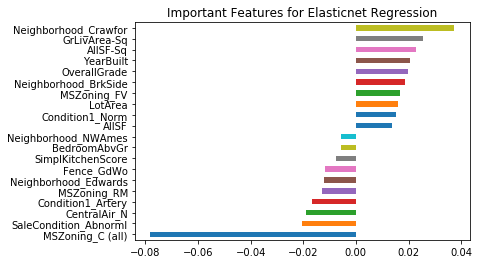

In [77]:
imp_coef = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coef.plot(kind = 'barh')
plt.title('Important Features for Elasticnet Regression')

# Conclusion

The best results are those of regularization methods & the best model was obtained by Lasso regularization.